In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
S = 22193.8
r = 0.05
t = 1 / 365

# Data Pre-processing


In [5]:
df = pd.read_csv("../res/fo27FEB2024bhav.csv", parse_dates=True).drop(
    columns=["Unnamed: 15"]
)
df

,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,TIMESTAMP
0,FUTIDX,BANKNIFTY,29-Feb-2024,0.0,XX,46545.00,46745.00,46310.30,46587.20,46587.20,155766,1087604.62,1826475,-162900,27-FEB-2024
1,FUTIDX,BANKNIFTY,28-Mar-2024,0.0,XX,46706.00,47080.00,46670.20,46927.05,46927.05,73729,518627.57,1324575,257205,27-FEB-2024
2,FUTIDX,BANKNIFTY,25-Apr-2024,0.0,XX,47250.00,47415.00,47028.55,47279.60,47279.60,2966,21013.69,90945,7215,27-FEB-2024
3,FUTIDX,FINNIFTY,27-Feb-2024,0.0,XX,20590.00,20640.00,20500.15,20554.30,20552.90,9796,80620.26,234560,126680,27-FEB-2024
4,FUTIDX,FINNIFTY,26-Mar-2024,0.0,XX,20749.85,20759.05,20660.00,20682.00,20682.00,2331,19299.93,44960,26840,27-FEB-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55201,OPTSTK,ZYDUSLIFE,25-Apr-2024,980.0,PE,0.00,0.00,0.00,227.65,52.90,0,0.00,0,0,27-FEB-2024
55202,OPTSTK,ZYDUSLIFE,25-Apr-2024,1000.0,PE,0.00,0.00,0.00,246.85,66.10,0,0.00,0,0,27-FEB-2024
55203,OPTSTK,ZYDUSLIFE,25-Apr-2024,1020.0,PE,0.00,0.00,0.00,208.55,80.65,0,0.00,0,0,27-FEB-2024
55204,OPTSTK,ZYDUSLIFE,25-Apr-2024,1040.0,PE,0.00,0.00,0.00,285.70,96.40,0,0.00,0,0,27-FEB-2024


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55206 entries, 0 to 55205
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   INSTRUMENT  55206 non-null  object 
 1   SYMBOL      55206 non-null  object 
 2   EXPIRY_DT   55206 non-null  object 
 3   STRIKE_PR   55206 non-null  float64
 4   OPTION_TYP  55206 non-null  object 
 5   OPEN        55206 non-null  float64
 6   HIGH        55206 non-null  float64
 7   LOW         55206 non-null  float64
 8   CLOSE       55206 non-null  float64
 9   SETTLE_PR   55206 non-null  float64
 10  CONTRACTS   55206 non-null  int64  
 11  VAL_INLAKH  55206 non-null  float64
 12  OPEN_INT    55206 non-null  int64  
 13  CHG_IN_OI   55206 non-null  int64  
 14  TIMESTAMP   55206 non-null  object 
dtypes: float64(7), int64(3), object(5)
memory usage: 6.3+ MB


In [7]:
nse = df.query(
    """SYMBOL == "NIFTY" & EXPIRY_DT == "29-Feb-2024" & \
    ((OPTION_TYP == "PE" & STRIKE_PR <= @S) | (OPTION_TYP == "CE" & STRIKE_PR >= @S))"""
).drop(columns=["INSTRUMENT", "SYMBOL", "EXPIRY_DT", "TIMESTAMP"])

nse

,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI
4578,22200.0,CE,90.00,129.00,77.00,108.35,108.35,3178415,35440287.41,7450250,889750
4579,22250.0,CE,70.00,103.50,59.70,84.25,84.25,1242455,13871824.11,3435700,265750
4580,22300.0,CE,65.00,81.00,45.05,63.10,63.10,1954887,21855401.58,7273600,440700
4581,22350.0,CE,43.35,62.00,32.70,45.65,45.65,944408,10574591.27,2803250,854500
4582,22400.0,CE,39.75,46.30,23.20,32.40,32.40,1489881,16710877.05,5852350,82450
...,...,...,...,...,...,...,...,...,...,...,...
4680,21950.0,PE,60.20,70.35,25.80,29.75,29.75,659278,7250476.15,2080850,561800
4681,22000.0,PE,85.00,87.00,34.05,39.45,39.45,1962421,21643220.01,8631400,1998450
4682,22050.0,PE,93.45,106.65,44.75,52.00,52.00,947467,10482059.84,1730700,449900
4683,22100.0,PE,123.00,132.35,58.10,67.00,67.00,2724532,30235508.32,6012500,1702250


# Option Price Calculation


In [8]:
def option_price(r, S, K, T, sigma, type="CE"):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if type == "CE":
        price = S * norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * norm.cdf(d2, 0, 1)
    elif type == "PE":
        price = -S * norm.cdf(-d1, 0, 1) + K * np.exp(-r * T) * norm.cdf(-d2, 0, 1)
    return price


option_price(r, S, 22000, t, 0.1)

198.9193585951798

In [9]:
nse.query("STRIKE_PR == 22000")

,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI
4681,22000.0,PE,85.0,87.0,34.05,39.45,39.45,1962421,21643220.01,8631400,1998450


# Implied Volatility Calculation


In [10]:
def bin_search_iv(strike_price, type="PE"):
    l = 0
    r = 2
    err = 1e-7

    actual_price = nse.loc[nse["STRIKE_PR"] == strike_price, "CLOSE"].tolist()[0]

    while l + err <= r:
        m = l + (r - l) / 2
        calculated_price = option_price(r, S, strike_price, t, m, type)
        if calculated_price > actual_price:
            r = m - err
        elif calculated_price < actual_price:
            l = m + err
        else:
            return m

    return l


bin_search_iv(22000)

0.250000025

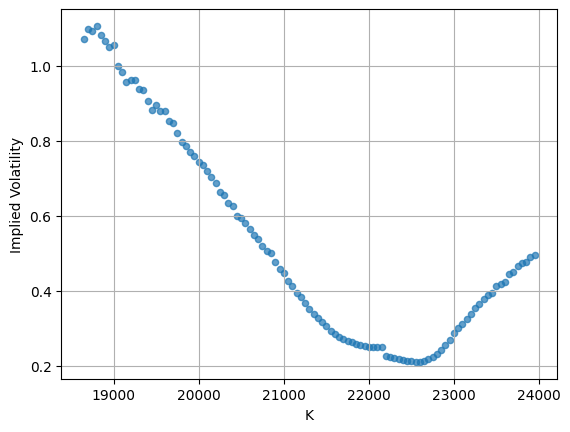

In [13]:
nse["IV"] = nse.apply(
    lambda row: bin_search_iv(row["STRIKE_PR"], row["OPTION_TYP"]), axis=1
)

plt.grid()
plt.xlabel("K")
plt.ylabel("Implied Volatility")
plt.scatter(nse["STRIKE_PR"], nse["IV"], s=20, alpha=0.7)

# Option Greeks


## Delta


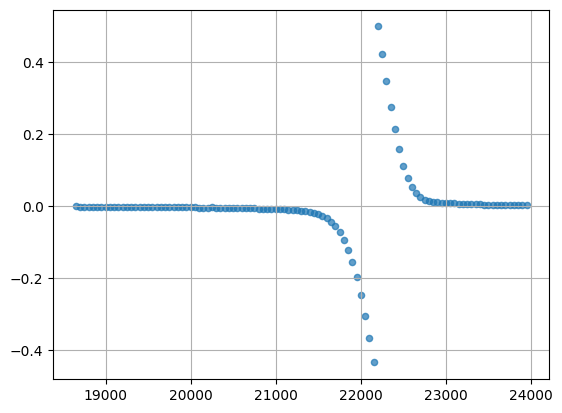

In [10]:
from py_vollib.black_scholes.greeks.numerical import delta

delta
nse["DELTA"] = nse.apply(
    lambda row: delta(
        "c" if row["OPTION_TYP"] == "CE" else "p", S, row["STRIKE_PR"], t, r, row["IV"]
    ),
    axis=1,
)
plt.grid()
plt.scatter(nse["STRIKE_PR"], nse["DELTA"], alpha=0.7, s=20)